# Chapter 6: A bit of Mozart, A bit of 'I've got Rhythm'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import music21

import IPython.display as ipd

import pt_utils
import pt_musicutils
import pt_keypattern
import pt_naming_conventions

import partita_music21

import jupyter_pt_tools as jpt_pt

***

## Mozart: vi - ii - V - 1 || six_two_five_one

Here, rendered in lovely sine waves, is a common, powerful sequence of chords.

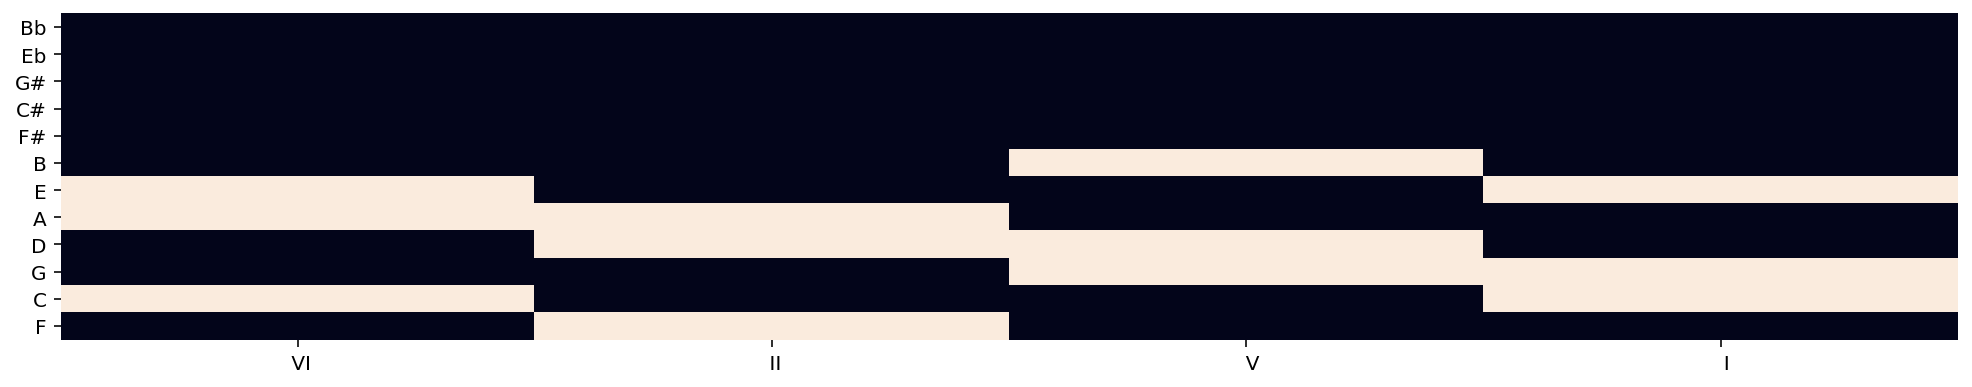

In [5]:
seq_length = 4
dur = 4

six_two_five_one = [np.array([0, 0, seq_length-i,4,2]) for i in range(seq_length)]

bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in six_two_five_one]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in six_two_five_one]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
ipd.Audio(sequence, rate=4000)

In [32]:
midi_full = music21.converter.parse("../notation/Moz545_vi_ii_V_I.mid")
sp = music21.midi.realtime.StreamPlayer(midi_full)
sp.play()

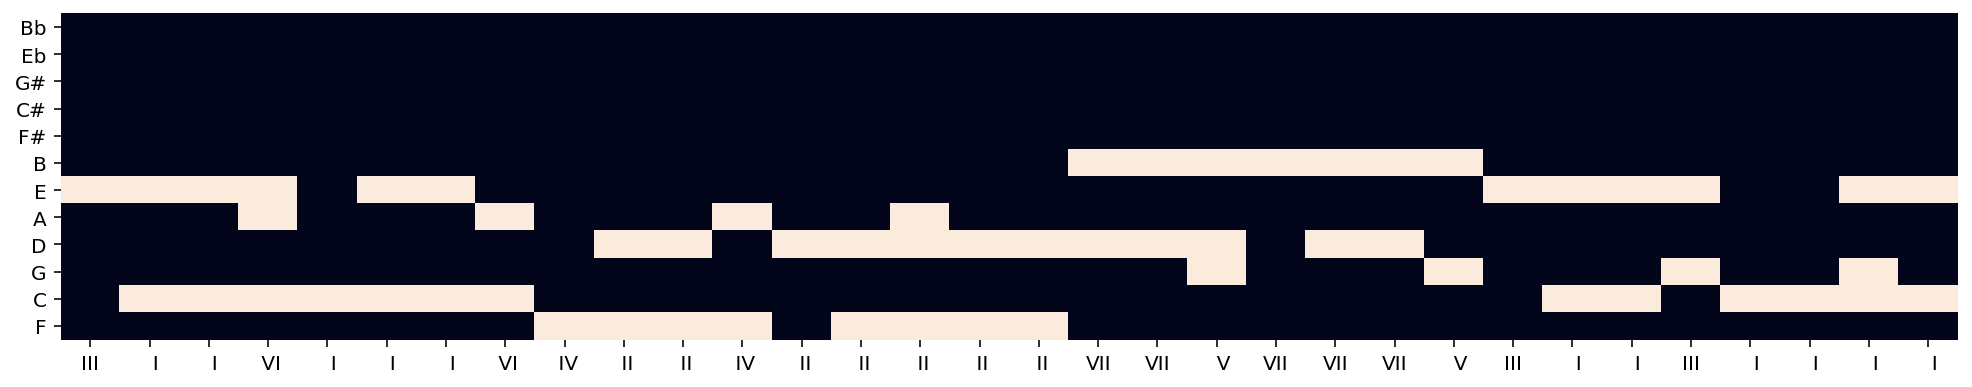

In [7]:
bin_a, kpdve_a = partita_music21.analyze_notation_file("../notation/Moz545_vi_ii_V_I.mid")
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in kpdve_a]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in kpdve_a]
jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
ipd.Audio(sequence, rate=4000)

## Changing Key - 1

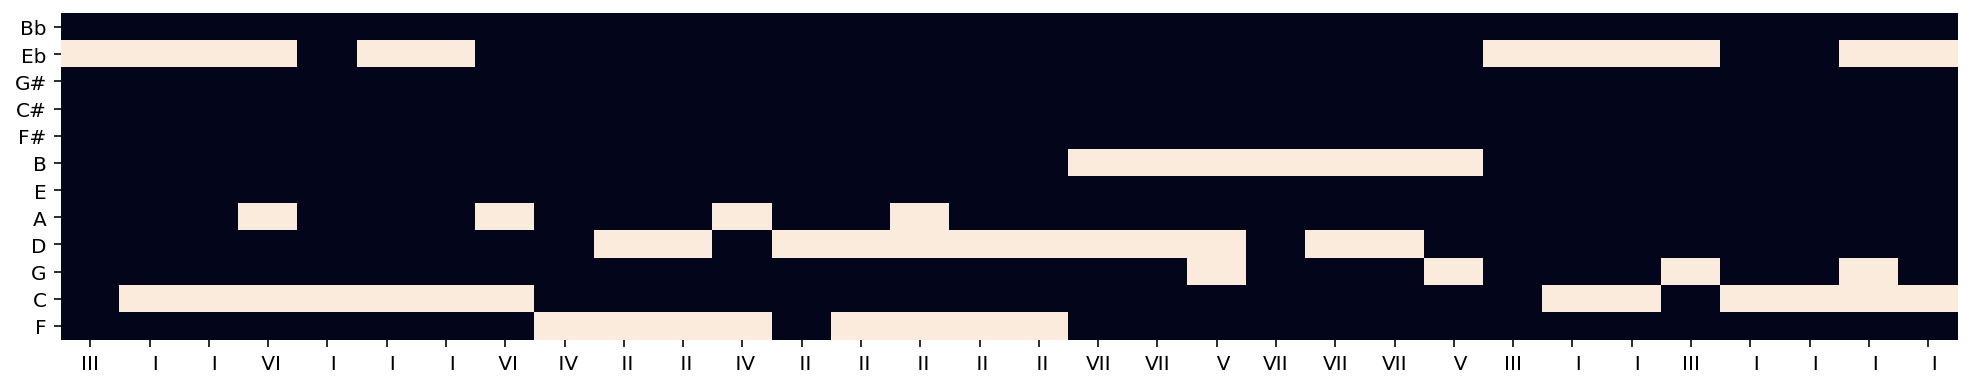

In [9]:
# make it parallel minor by adding a distortion vector to the original.
six_two_five_one_m = kpdve_a + np.array([0, 5, 0, 0, 0])
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in six_two_five_one_m]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in six_two_five_one_m]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
ipd.Audio(sequence, rate=4000)

## Changing Key - 2

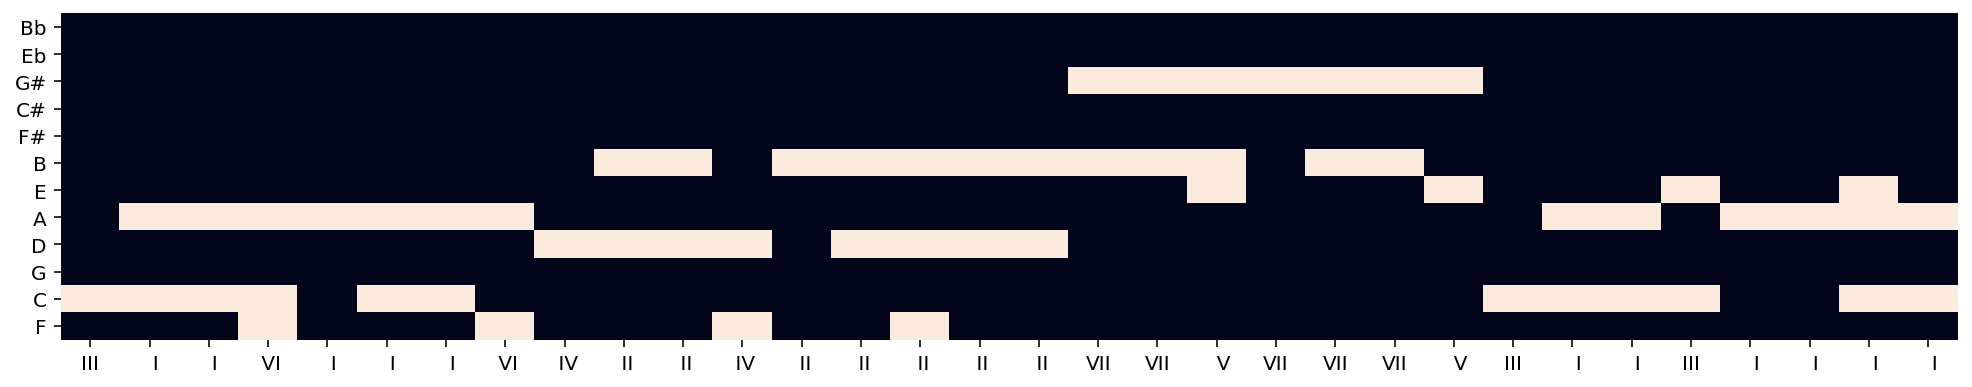

In [12]:
# make it relative minor by adding a distortion vector and switching to the sixth
six_two_five_one_m = kpdve_a + np.array([0, 3, 3, 0, 0])
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in six_two_five_one_m]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in six_two_five_one_m]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
ipd.Audio(sequence, rate=4000)

## I've got Rhythm  I - vi - ii - V || one_six_two_five


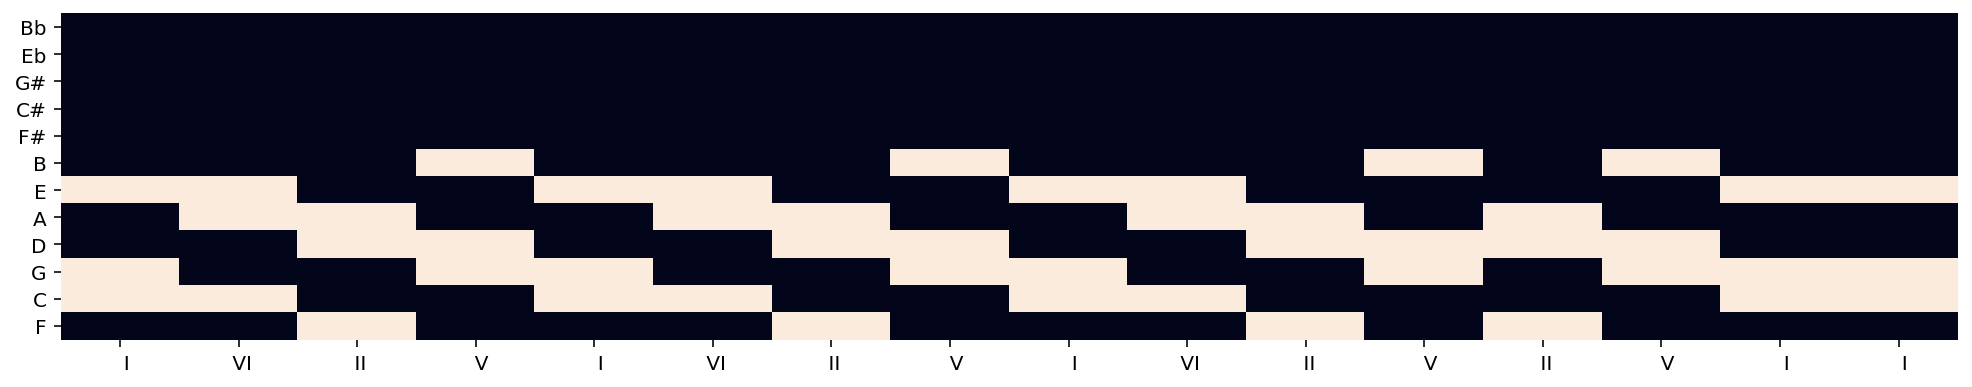

In [15]:
dur = 5

rhythm_changes = [six_two_five_one[3]] + six_two_five_one[0:3]

kpdve_seq = []
kpdve_seq += 3 * rhythm_changes
kpdve_seq += six_two_five_one[1:]
kpdve_seq += [six_two_five_one[-1]]


rhythm_chart = kpdve_seq


bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in rhythm_chart]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in rhythm_chart]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

rhythm_sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
ipd.Audio(rhythm_sequence, rate=4000)

## Arpeggios

In [16]:
arp_rhythm_sequence = jpt_pt.link_wavestep_sequences(bin_seq, duration=dur)
ipd.Audio(arp_rhythm_sequence, rate=4000)

## Thickening chords

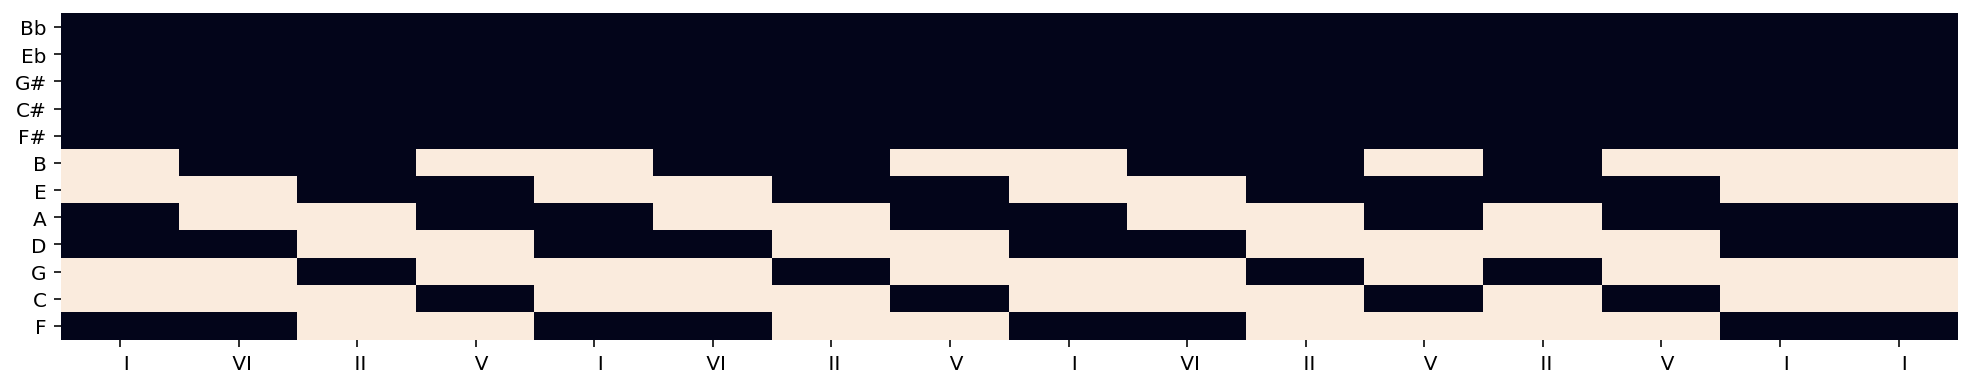

In [21]:
four_note_chart = np.array([0, 0, 0, 0, 1]) + rhythm_chart

# make it minor?
# four_note_chart = four_note_chart + np.array([0,5,0,0,0])
# make it almost a scale?
# four_note_chart = four_note_chart + np.array([5,0,0,0,1])

bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in four_note_chart]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in four_note_chart]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

arp_rhythm_sequence = jpt_pt.link_wavestep_sequences(bin_seq, duration=dur)
ipd.Audio(arp_rhythm_sequence, rate=4000)

## Bass Line

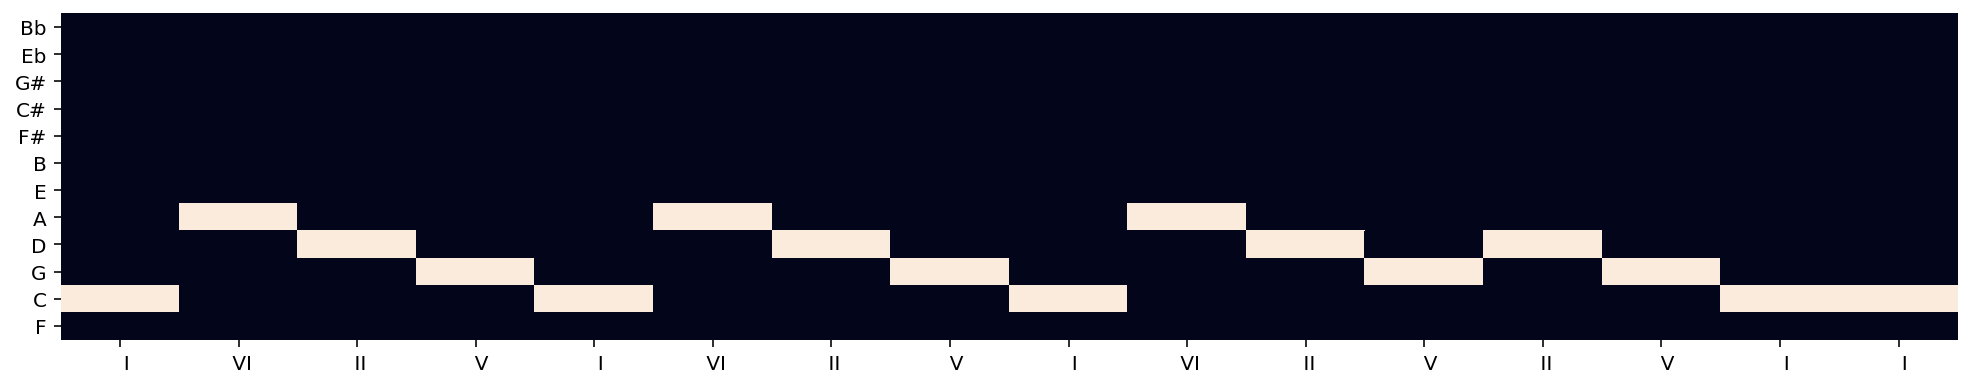

In [23]:
# octave lower, need good process for that...

bin_seq = [pt_musicutils.circle_root_note_for_KPDVE(a_kpdve) for a_kpdve in four_note_chart]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in four_note_chart]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

bass_sequence = jpt_pt.link_wavestep_sequences(bin_seq, duration=dur, from_middle_c=-1)
ipd.Audio(bass_sequence, rate=4000)

## Sum

In [25]:
combo_sequence = bass_sequence + arp_rhythm_sequence
ipd.Audio(combo_sequence, rate=4000)

## Comparing Audio and Binary Representation

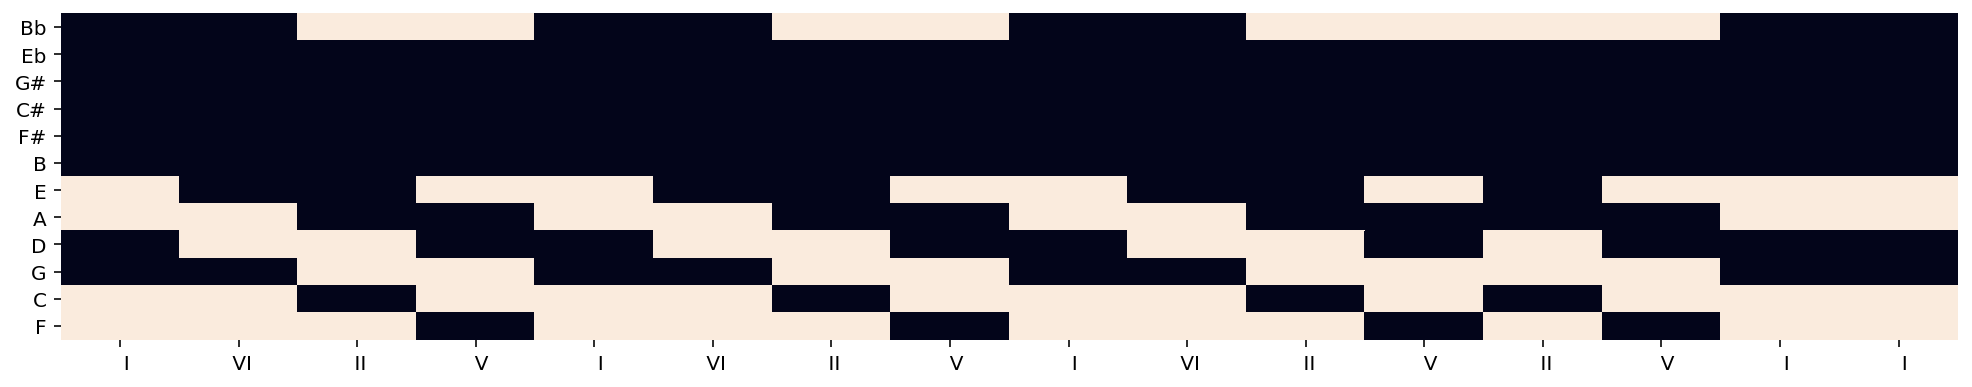

In [28]:
Fmaj_chart = np.array([11, 0, 0, 0, 1]) + rhythm_chart
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in Fmaj_chart]
funcs = [pt_naming_conventions.chord_function_in_key(a_kpdve) for a_kpdve in Fmaj_chart]

jpt_pt.horizontal_notegroup_heatmap(bin_seq, xticks=funcs)

arp_f_sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=9)
ipd.Audio(arp_f_sequence, rate=4000)

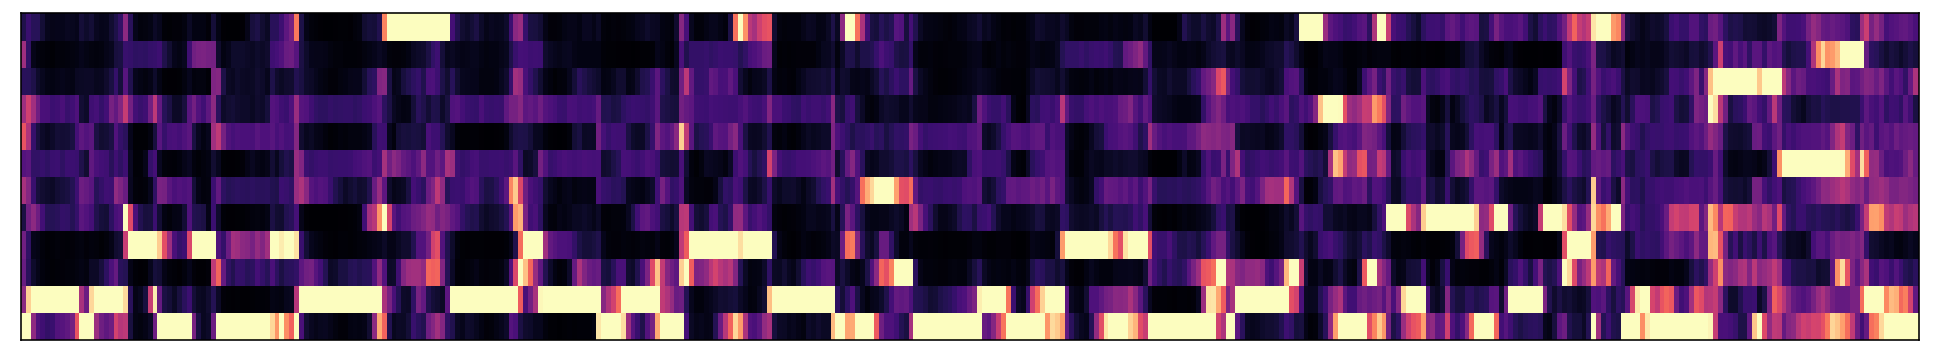

In [31]:
import librosa
import librosa.display

filename = "../audio/iGotRhythm_main16.wav"
y, sr = librosa.load(filename)
chroma_a = librosa.feature.chroma_stft(y=y,
                                      sr=sr)
plt.figure(figsize=(17, 3))
chroma_a = jpt_pt.switch_chroma(chroma_a)

librosa.display.specshow(chroma_a)

ipd.Audio(filename)

<Figure size 1224x216 with 0 Axes>

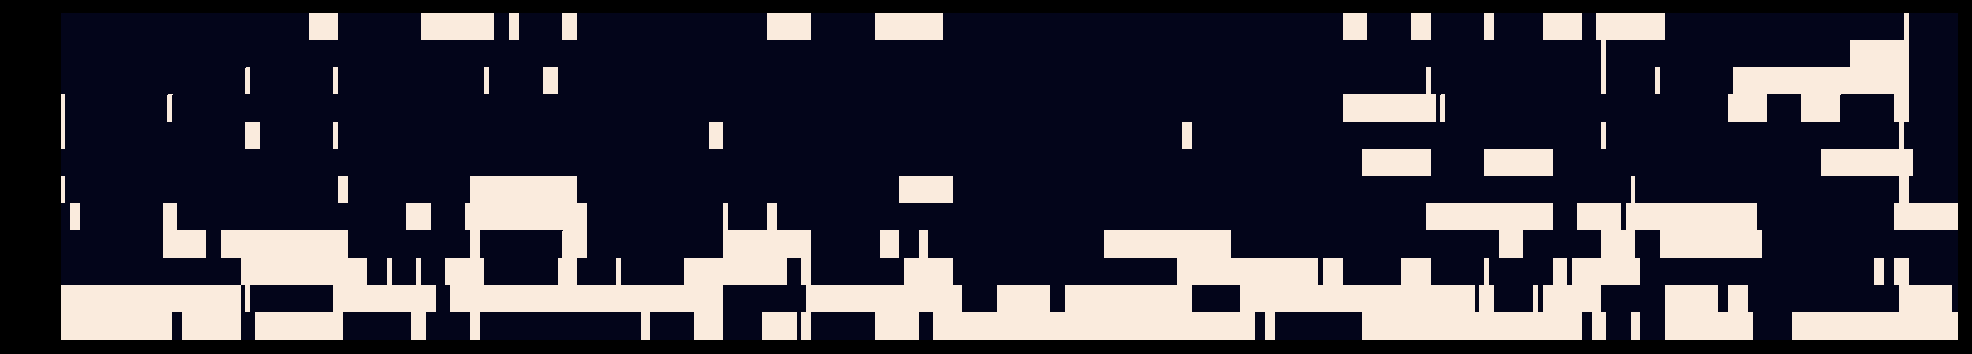

In [17]:
import partita_librosa

plt.figure(figsize=(17, 3))

bin_chroma, kdpve_chroma = partita_librosa.analyze_chroma_list(chroma_a)
jpt_pt.horizontal_notegroup_heatmap(bin_chroma)